## Coding Excercise #0305

### 1. Dummy variable and interaction:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#What Is This Exercise About?
#In this exercise, you will explore how to convert a categorical variable into dummy variables. You will see that dummy variables can interact with other variables further improving the diagnostic metrics.

#### 1.1. Read in the data:

In [2]:
# Go to the directory where the data file is located. 
# os.chdir(r'~/{directorypath}')                # Please, replace the path with your own.   

# Get current working directory
directory = os.getcwd()
print(f"Current directory: Before= {directory}")

Current directory: Before= C:\Users\prati\SAMSUNG_AI\Module 4 - Intro to Machine Learning


In [3]:
df = pd.read_csv('weight-height.csv', header='infer',encoding='latin1')

In [4]:
# We will use 3 variables: height, weight and gender.
df.head(5)

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


####  1.2. Linear regression without dummy variable:
<br>
The formula is: weight ~ height

In [5]:
# Do the regression as usual.
lm = LinearRegression()
X = df.height.values.reshape(-1,1)
Y = df.weight.values.reshape(-1,1)
lm.fit(X,Y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
rsq1 = lm.score(X,Y)
rmse1 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

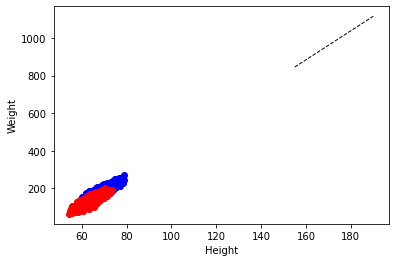

In [6]:
# Visualize.
# No need to distinguish the regression line by gender.
df_m = df[df.gender=='Male']
df_f = df[df.gender=='Female']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='black')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

####  1.3. Linear regression with dummy variable:
<br>
The formula is: weight ~ height + gender

In [7]:
# Create a dummy variable for 'gender':
gender_dummy = pd.get_dummies(df.gender, drop_first=True, prefix='gender')
X = df[['height']].join(gender_dummy)
Y = df[['weight']]

In [8]:
# Do the regression as usual.
lm.fit(X,Y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
rsq2 = lm.score(X,Y)
rmse2 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

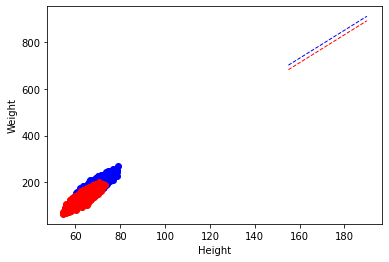

In [9]:
# Visualize.
# Distinguish the regression lines by gender.
df_m = df[df.gender=='Male']
df_f = df[df.gender=='Female']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + b1*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

####  1.4. Linear regression with dummy variable that interacts:
<br>
The formula is: weight ~ height + gender + height $\times$ gender

In [10]:
# Create a dummy variable for 'gender':
gender_dummy = pd.get_dummies(df.gender, drop_first=True, prefix='gender')
X = df[['height']].join(gender_dummy)
Y = df[['weight']]
X

,height,gender_Male
0,73.847017,1
1,68.781904,1
2,74.110105,1
3,71.730978,1
4,69.881796,1
...,...,...
9995,66.172652,0
9996,67.067155,0
9997,63.867992,0
9998,69.034243,0


In [11]:
# Create the interaction term. 
X['height x gender_Male'] = X['height']*X['gender_Male']
X.head(5)

,height,gender_Male,height x gender_Male
0,73.847017,1,73.847017
1,68.781904,1,68.781904
2,74.110105,1,74.110105
3,71.730978,1,71.730978
4,69.881796,1,69.881796


In [12]:
# Do the regression as usual.
lm.fit(X,Y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
b3 = lm.coef_[0][2]
rsq3 = lm.score(X,Y)
rmse3 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

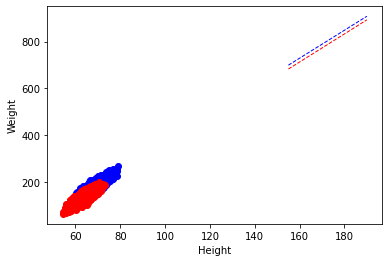

In [13]:
# Visualize.
# Distinguish the regression lines by gender.
df_m = df[df.gender=='Male']
df_f = df[df.gender=='Female']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + (b1+b3)*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### 1.5. Compare  $R^2$, RMSE for the different cases:

In [14]:
np.round([rsq1, rsq2, rsq3],3)                  

array([0.855, 0.903, 0.903])

In [15]:
np.round([rmse1, rmse2, rmse3],3)               

array([12.219, 10.013, 10.012])

NOTE: With a dummy variable that interacts, the $R^2$ is the highest and the *RMSE* is the lowest. 